#1.Boston 주택 가격 예측 모델

**데이터 로드 및 전처리**

In [110]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [111]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [112]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
import numpy as np
mean = np.mean(train_data)
std = np.std(train_data)

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_data = (train_data - mean) / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = (test_data - mean) / std

from sklearn.model_selection import train_test_split

train_data, val_data, train_labels, val_labels = (train_test_split(train_data, train_labels, test_size=0.3, random_state=42))

**모델 구성 및 컴파일**

In [113]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
print(train_data.shape[1], )

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss = 'mse', metrics = 'mae')

13


**모델 학습**

In [114]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels, epochs=100, batch_size = 16, validation_data=(val_data, val_labels))

Epoch 1/100
18/18 [==============================] - 1s 15ms/step - loss: 570.3376 - mae: 21.8764 - val_loss: 399.7025 - val_mae: 18.1870
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 468.2291 - mae: 19.2841 - val_loss: 285.0949 - val_mae: 14.5891
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 319.5633 - mae: 14.8612 - val_loss: 143.0892 - val_mae: 9.0162
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 167.4029 - mae: 10.0163 - val_loss: 84.3822 - val_mae: 6.9010
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 122.6793 - mae: 8.3483 - val_loss: 91.8964 - val_mae: 7.4585
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9344 - mae: 7.8941 - val_loss: 78.2353 - val_mae: 6.6827
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 104.5660 - mae: 7.4557 - val_loss: 73.2372 - val_mae: 6.3931
Epoch 8/100
18/18 [==============================] -

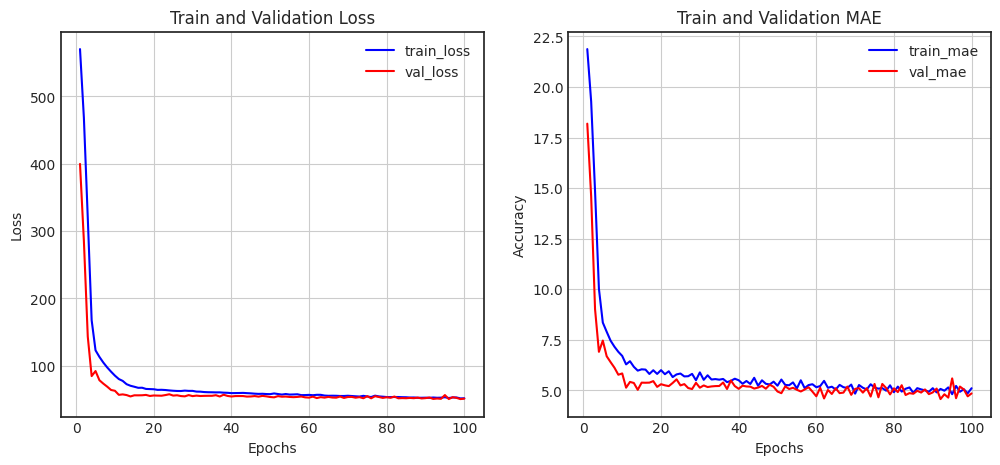

In [115]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
import seaborn as sns
sns.set_style('white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

**모델 평가 및 예측**

In [116]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)
pred_ys = model.predict(test_data)
print(pred_ys)


4/4 [==============================] - 0s 3ms/step
[[12.7201  ]
 [20.905077]
 [26.067354]
 [21.280783]
 [25.763227]
 [21.326841]
 [28.391687]
 [27.10325 ]
 [25.26992 ]
 [17.975466]
 [16.976118]
 [23.402227]
 [19.897318]
 [28.311953]
 [16.203856]
 [25.188112]
 [23.130342]
 [20.939194]
 [17.790855]
 [18.410639]
 [15.376244]
 [14.391569]
 [23.871334]
 [24.28341 ]
 [31.688723]
 [18.307451]
 [24.098307]
 [38.227646]
 [13.79619 ]
 [24.157896]
 [21.178883]
 [14.314284]
 [30.029062]
 [22.81714 ]
 [17.219927]
 [14.493241]
 [19.140192]
 [18.390371]
 [17.925694]
 [33.564   ]
 [28.98081 ]
 [24.311586]
 [17.372084]
 [23.726748]
 [29.126337]
 [27.062101]
 [30.417181]
 [23.18894 ]
 [18.578989]
 [24.141241]
 [36.95603 ]
 [23.167032]
 [16.158194]
 [22.830893]
 [27.26274 ]
 [25.949564]
 [16.770542]
 [27.628626]
 [30.36947 ]
 [26.271059]
 [17.95349 ]
 [17.488241]
 [14.368429]
 [21.796438]
 [24.715946]
 [32.24363 ]
 [15.988283]
 [29.789341]
 [14.607669]
 [15.176609]
 [18.247677]
 [25.496126]
 [18.34823 ]


**전반적인 분석**

에포크를 100으로 돌리면 과소적합도 아니고 과대적합도 아닌 걸로 보인다.
다만 궁금증이 들어서 에포크를 90으로 바꿔서 다시 학습시켜보았다.

In [117]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels, epochs=90, batch_size = 16, validation_data=(val_data, val_labels))

Epoch 1/90
18/18 [==============================] - 0s 14ms/step - loss: 51.6937 - mae: 4.9182 - val_loss: 50.1309 - val_mae: 4.6763
Epoch 2/90
18/18 [==============================] - 0s 6ms/step - loss: 51.4199 - mae: 4.7939 - val_loss: 51.1922 - val_mae: 4.9529
Epoch 3/90
18/18 [==============================] - 0s 7ms/step - loss: 50.7768 - mae: 4.9923 - val_loss: 51.3931 - val_mae: 4.9294
Epoch 4/90
18/18 [==============================] - 0s 7ms/step - loss: 52.3542 - mae: 4.9852 - val_loss: 51.9888 - val_mae: 5.0622
Epoch 5/90
18/18 [==============================] - 0s 9ms/step - loss: 50.6547 - mae: 4.8399 - val_loss: 50.4709 - val_mae: 4.8033
Epoch 6/90
18/18 [==============================] - 0s 5ms/step - loss: 50.7485 - mae: 5.0475 - val_loss: 49.9314 - val_mae: 4.6867
Epoch 7/90
18/18 [==============================] - 0s 5ms/step - loss: 50.2748 - mae: 4.8751 - val_loss: 50.4316 - val_mae: 4.8845
Epoch 8/90
18/18 [==============================] - 0s 5ms/step - loss: 50.

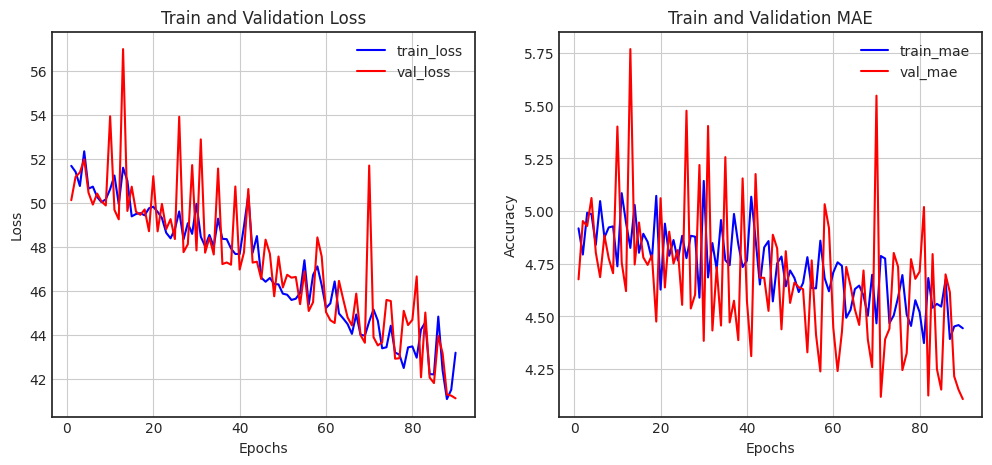

In [118]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
import seaborn as sns
sns.set_style('white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

에포크를 90으로 하니 과적합에서는 벗어났지만 loss가 불안정하다. validation loss 뿐만 아니라 train loss까지 불안정해졌다. 이를 해결하기 위해서는 학습률을 조정하거나, 데이터 정규화를 하거나 더 많은 데이터를 사용하는 방법이 있다. 데이터 정규화는 이미 했고,optimizer로 adam을 쓰기 때문에 'LearningRateScheduler'콜백을 추가해보는 것도 방법으로 보인다. 마지막으론 더 많은 데이터를 사용해야할 필요가 있어 보인다.
그런데 이 에포크를 줄였을때 loss가 갑자기 불안정해지는건지는 더 공부를 해봐야할 것 같다.

#2.Reuters 딥러닝 모델

**데이터 로드 및 전처리**


In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [120]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

from sklearn.model_selection import train_test_split
train_data, val_data, train_labels, val_labels = (train_test_split(train_data, train_labels, test_size=0.25, random_state=42))

print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [121]:
print(train_labels)
print(type(train_labels))

[ 3  3  3 ... 20  3  3]
<class 'numpy.ndarray'>


In [122]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    matrix = np.zeros((len(data), dim))
    for i, d in enumerate(data) :
        matrix[i, d] = 1.
    return matrix

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

**모델 구성 및 컴파일**

BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성합니다.

In [123]:
inputs = layers.Input(shape=(10000,))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(46, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=x)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 10000)]           0         
                                                                 
 dense_41 (Dense)            (None, 128)               1280128   
                                                                 
 batch_normalization_21 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 re_lu_21 (ReLU)             (None, 128)               0         
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_42 (Dense)            (None, 128)               16512     
                                                           

**모델 학습**

In [124]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history = model.fit(x_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(x_test, y_test))

Epoch 1/30
53/53 [==============================] - ETA: 0s - loss: 2.5609 - accuracy: 0.4615

53/53 [==============================] - 5s 45ms/step - loss: 2.5609 - accuracy: 0.4615 - val_loss: 3.1728 - val_accuracy: 0.6701
Epoch 2/30
53/53 [==============================] - ETA: 0s - loss: 1.2302 - accuracy: 0.7340

53/53 [==============================] - 2s 38ms/step - loss: 1.2302 - accuracy: 0.7340 - val_loss: 2.9379 - val_accuracy: 0.7186
Epoch 3/30
53/53 [==============================] - ETA: 0s - loss: 0.9036 - accuracy: 0.7874

53/53 [==============================] - 2s 37ms/step - loss: 0.9036 - accuracy: 0.7874 - val_loss: 2.7156 - val_accuracy: 0.7480
Epoch 4/30
53/53 [==============================] - ETA: 0s - loss: 0.7062 - accuracy: 0.8327

53/53 [==============================] - 2s 47ms/step - loss: 0.7062 - accuracy: 0.8327 - val_loss: 2.2714 - val_accuracy: 0.7609
Epoch 5/30
53/53 [==============================] - ETA: 0s - loss: 0.5791 - accuracy: 0.8591

53/53 [==============================] - 2s 46ms/step - loss: 0.5791 - accuracy: 0.8591 - val_loss: 1.8119 - val_accuracy: 0.7747
Epoch 6/30
53/53 [==============================] - ETA: 0s - loss: 0.4774 - accuracy: 0.8844

53/53 [==============================] - 2s 35ms/step - loss: 0.4774 - accuracy: 0.8844 - val_loss: 1.3711 - val_accuracy: 0.7752
Epoch 7/30
53/53 [==============================] - ETA: 0s - loss: 0.4224 - accuracy: 0.8974

53/53 [==============================] - 2s 36ms/step - loss: 0.4224 - accuracy: 0.8974 - val_loss: 1.1567 - val_accuracy: 0.7876
Epoch 8/30
53/53 [==============================] - ETA: 0s - loss: 0.3584 - accuracy: 0.9157

53/53 [==============================] - 2s 36ms/step - loss: 0.3584 - accuracy: 0.9157 - val_loss: 1.0891 - val_accuracy: 0.7903
Epoch 9/30
53/53 [==============================] - ETA: 0s - loss: 0.3092 - accuracy: 0.9264

53/53 [==============================] - 2s 34ms/step - loss: 0.3092 - accuracy: 0.9264 - val_loss: 1.0672 - val_accuracy: 0.7961
Epoch 10/30
53/53 [==============================] - ETA: 0s - loss: 0.2900 - accuracy: 0.9305

53/53 [==============================] - 2s 44ms/step - loss: 0.2900 - accuracy: 0.9305 - val_loss: 1.0647 - val_accuracy: 0.7885
Epoch 11/30
52/53 [============================>.] - ETA: 0s - loss: 0.2512 - accuracy: 0.9392

53/53 [==============================] - 3s 48ms/step - loss: 0.2514 - accuracy: 0.9391 - val_loss: 1.0904 - val_accuracy: 0.7912
Epoch 12/30
53/53 [==============================] - ETA: 0s - loss: 0.2385 - accuracy: 0.9382

53/53 [==============================] - 2s 34ms/step - loss: 0.2385 - accuracy: 0.9382 - val_loss: 1.1243 - val_accuracy: 0.7939
Epoch 13/30
53/53 [==============================] - ETA: 0s - loss: 0.2253 - accuracy: 0.9434

53/53 [==============================] - 2s 34ms/step - loss: 0.2253 - accuracy: 0.9434 - val_loss: 1.1555 - val_accuracy: 0.7979
Epoch 14/30
53/53 [==============================] - ETA: 0s - loss: 0.2187 - accuracy: 0.9434

53/53 [==============================] - 2s 34ms/step - loss: 0.2187 - accuracy: 0.9434 - val_loss: 1.1531 - val_accuracy: 0.7952
Epoch 14: early stopping


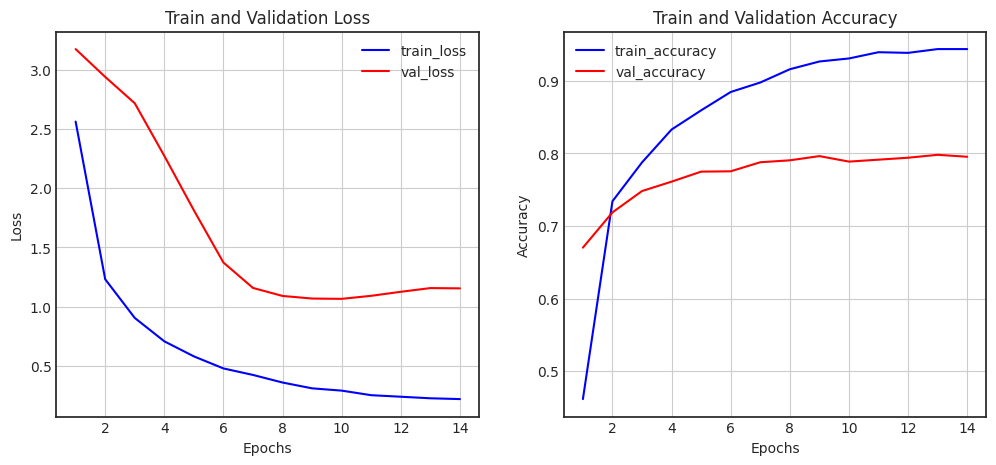

In [125]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
import seaborn as sns
sns.set_style('white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

**모델 평가 및 예측**


In [126]:
model.evaluate(x_test, y_test)
pred_ys = model.predict(x_test)
print(pred_ys)

71/71 [==============================] - 0s 5ms/step
[[6.6153065e-04 2.2017683e-03 4.9853417e-05 ... 8.1758271e-06
  2.4647456e-05 2.1225378e-05]
 [2.3179609e-02 7.8118173e-03 4.4904328e-03 ... 1.3111641e-02
  1.5401206e-03 9.6619129e-03]
 [9.0493902e-04 8.5679585e-01 1.6307966e-03 ... 3.1469521e-04
  1.9192561e-03 8.7391288e-04]
 ...
 [1.3252566e-06 3.5499984e-06 3.6001918e-06 ... 3.9961253e-07
  1.4718271e-06 6.2505359e-07]
 [3.8761669e-03 2.5378438e-02 4.5513702e-04 ... 1.0230139e-04
  7.1783917e-04 3.9326257e-04]
 [2.7660062e-04 9.3605942e-01 3.4754172e-03 ... 7.2952324e-05
  2.3513123e-04 1.7768214e-04]]


**전반적인 분석**

테스트 데이터의 accuracy는 79.88%이다.
val set은 loss가 줄어들다가 증가하는 것을 확인할 수 있다. 이는 과적합이 의심된다.

# 3.CIFAR10 딥러닝 모델

**데이터 로드 및 전처리**

In [127]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [128]:
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()
print(len(train_data))
print(len(test_data))
x_train_full = train_data
y_train_full = train_labels
x_test = test_data
y_test = test_labels

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = (train_test_split(train_data, train_labels, test_size=0.2, random_state=42))

print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

50000
10000
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [129]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

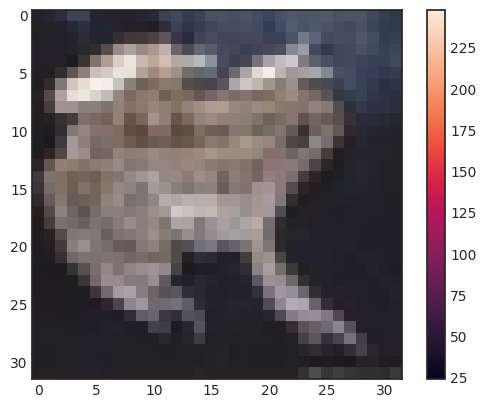

In [130]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
import seaborn as sns
sns.set_style('white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [131]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [132]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)  #1D로 평면화
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [142]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
X_train = x_train / 255.
X_val = x_val / 255.
X_test = x_test / 255.

**모델 구성 및 컴파일**

In [134]:
inputs = layers.Input(shape=(3072,))
x = layers.Dense(2048, activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=x)

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 3072)]            0         
                                                                 
 dense_44 (Dense)            (None, 2048)              6293504   
                                                                 
 batch_normalization_23 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 re_lu_23 (ReLU)             (None, 2048)              0         
                                                                 
 dropout_23 (Dropout)        (None, 2048)              0         
                                                                 
 dense_45 (Dense)            (None, 1024)              2098176   
                                                           

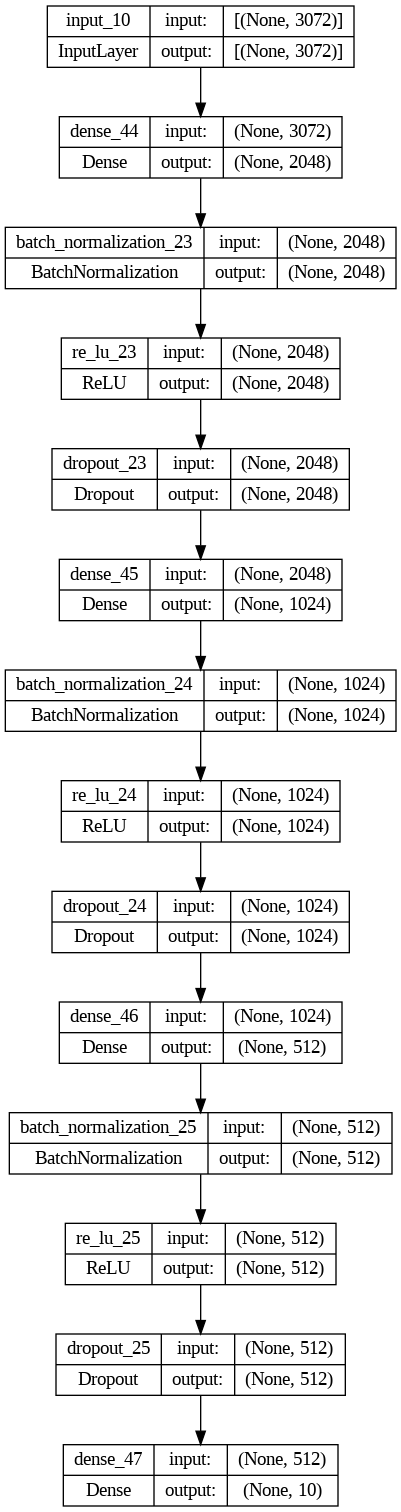

In [135]:
utils.plot_model(model, show_shapes=True)

**모델 학습**

In [138]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 3072)
(10000, 3072)
(40000, 1)
(10000, 1)


In [140]:
Y_train = utils.to_categorical(y_train)
Y_test = utils.to_categorical(y_test)

In [143]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es2 = EarlyStopping(monitor='val_loss',patience=4, restore_best_weights=True)
mc2 = ModelCheckpoint('best_model.h6', monitor='val_acc', save_best_only=True)

history = model.fit(X_train, Y_train, batch_size=128, epochs=30, callbacks=[es2, mc2], validation_data=(X_test, Y_test))

Epoch 1/30


TypeError: ignored

In [ ]:
model.evaluate(x_test, y_test)
pred_ys = model.predict(x_test)
print(pred_ys[5])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])